In [1]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel('/content/drive/MyDrive/Ecommerce Sentiment Analysis/Dataset/Bangla.xlsx')

In [5]:
newdf = df.copy()

In [6]:
df.head()

,Comments,sentiment
0,এই পণ্য ভাল না।,Negative
1,১০০% অথেন্টিক প্রডাক্ট,Positive
2,৩ বছরের ওয়ারেন্টিও আছে!,Positive
3,পিকাবো থেকে চমৎকার সেবা।,Positive
4,পিওরিট সম্পর্কে কোন সন্দেহ নেই।,Positive


In [7]:
df.shape

(2577, 2)

In [8]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.sentiment =='Negative']),
      "\nTotal Positive :",len(df[df.sentiment=='Positive']))

Total Comment: 2577 
Total Negative : 1138 
Total Positive : 1439


In [9]:
import os

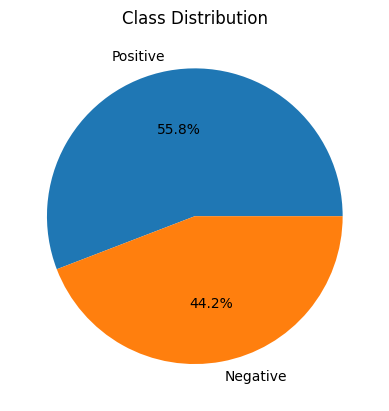

In [10]:
class_counts = df['sentiment'].value_counts()
class_percents = class_counts / class_counts.sum() * 100
# Plot the pie chart
plt.pie(class_percents, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

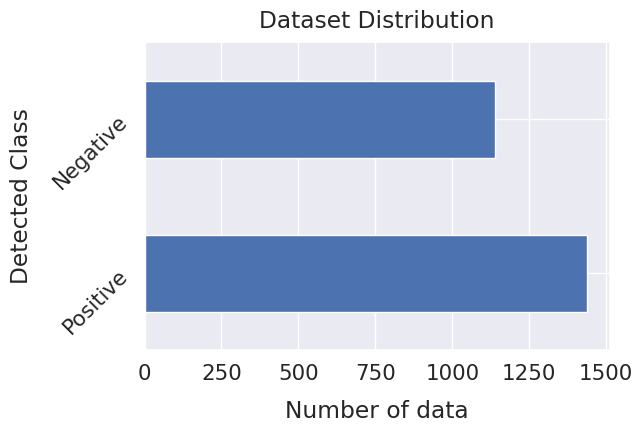

In [11]:
sns.set(font_scale=1.4)
df['sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
plt.savefig("Dataset Distribution BarChart.png")

# **Data Preperation and Cleaning**

# **Removing Duplicate Rows**

In [12]:
df.shape

(2577, 2)

In [13]:
# df.drop_duplicates(inplace=True)

In [14]:
df.shape

(2577, 2)

# **Stopwords Removal**

In [15]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Ecommerce Sentiment Analysis/Code Porter/stopwords-bn (1).txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [16]:
df.dtypes

Comments     object
sentiment    object
dtype: object

In [17]:
df['cleaned'] = df['Comments'].apply(process_conversations)
sample_data = [10,700]
for i in sample_data:
     print('Original:\n',df.Comments[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Detected as:-- ',df.sentiment[i],'\n')

Original:
 আপনি এটা অনুশোচনা করবে না। 
Cleaned:
 অনুশোচনা না  
 Detected as:--  Positive 

Original:
 এই দ্রেসের ফ্যাব্রিক অসাধারণ এবং এটি নিখুত ফিট করে। 
Cleaned:
 দ্রেসের ফ্যাব্রিক অসাধারণ নিখুত ফিট করে  
 Detected as:--  Negative 



In [18]:
df

,Comments,sentiment,cleaned
0,এই পণ্য ভাল না।,Negative,পণ্য ভাল না
1,১০০% অথেন্টিক প্রডাক্ট,Positive,১০০ অথেন্টিক প্রডাক্ট
2,৩ বছরের ওয়ারেন্টিও আছে!,Positive,৩ বছরের ওয়ারেন্টিও আছে
3,পিকাবো থেকে চমৎকার সেবা।,Positive,পিকাবো চমৎকার সেবা
4,পিওরিট সম্পর্কে কোন সন্দেহ নেই।,Positive,পিওরিট সম্পর্কে সন্দেহ নেই
...,...,...,...
2572,"হেডফোনটা সত্যিই অসাধারণ , অনেক সুন্দর সাউন্ড এ...",Positive,হেডফোনটা সত্যিই অসাধারণ সুন্দর সাউন্ড জোরে স...
2573,হেডফোনের গুণমান এই মূল্য পরিসরে ভাল নয়।,Negative,হেডফোনের গুণমান মূল্য পরিসরে ভাল নয়
2574,"হেভি গেমিং এর জন্য বেস্ট, ক্যামেরাও অনেক ভালো",Positive,হেভি গেমিং বেস্ট ক্যামেরাও ভালো
2575,হ্যাঁ খুশি ভাল অবস্থা,Positive,হ্যাঁ খুশি ভাল অবস্থা


# **Removing Small Texts**

In [19]:
df['length'] = df['cleaned'].apply(lambda x:len(x.split()))

dataset = df.loc[df.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

dataset['no_char'] = df['cleaned'].apply(lambda cleaned: len(cleaned))

After Cleaning: 
Removed 0 Small conversations 
Total conversations: 2577


In [20]:
dataset

,Comments,sentiment,cleaned,length,no_char
0,এই পণ্য ভাল না।,Negative,পণ্য ভাল না,3,12
1,১০০% অথেন্টিক প্রডাক্ট,Positive,১০০ অথেন্টিক প্রডাক্ট,3,22
2,৩ বছরের ওয়ারেন্টিও আছে!,Positive,৩ বছরের ওয়ারেন্টিও আছে,4,23
3,পিকাবো থেকে চমৎকার সেবা।,Positive,পিকাবো চমৎকার সেবা,3,19
4,পিওরিট সম্পর্কে কোন সন্দেহ নেই।,Positive,পিওরিট সম্পর্কে সন্দেহ নেই,4,27
...,...,...,...,...,...
2572,"হেডফোনটা সত্যিই অসাধারণ , অনেক সুন্দর সাউন্ড এ...",Positive,হেডফোনটা সত্যিই অসাধারণ সুন্দর সাউন্ড জোরে স...,13,88
2573,হেডফোনের গুণমান এই মূল্য পরিসরে ভাল নয়।,Negative,হেডফোনের গুণমান মূল্য পরিসরে ভাল নয়,6,37
2574,"হেভি গেমিং এর জন্য বেস্ট, ক্যামেরাও অনেক ভালো",Positive,হেভি গেমিং বেস্ট ক্যামেরাও ভালো,5,32
2575,হ্যাঁ খুশি ভাল অবস্থা,Positive,হ্যাঁ খুশি ভাল অবস্থা,4,21


# **Stemming**

In [21]:
# !pip install bangla-stemmer
# from bangla_stemmer.stemmer import stemmer
# ## stemmer function
# def stem_text (x):
#   stmr = stemmer.BanglaStemmer()
#   words=x.split(' ')
#   stm = stmr.stem(words)
#   words=(' ').join(stm)
#   return words

In [22]:
from nltk.stem import LancasterStemmer, PorterStemmer
porter_stemmer = PorterStemmer()
def porter_stemming(text):
    return ' '.join([porter_stemmer.stem(word) for word in text.split()])
dataset['stemming'] = dataset['cleaned'].apply(porter_stemming)

In [23]:
dataset.head()

,Comments,sentiment,cleaned,length,no_char,stemming
0,এই পণ্য ভাল না।,Negative,পণ্য ভাল না,3,12,পণ্য ভাল না
1,১০০% অথেন্টিক প্রডাক্ট,Positive,১০০ অথেন্টিক প্রডাক্ট,3,22,১০০ অথেন্টিক প্রডাক্ট
2,৩ বছরের ওয়ারেন্টিও আছে!,Positive,৩ বছরের ওয়ারেন্টিও আছে,4,23,৩ বছরের ওয়ারেন্টিও আছে
3,পিকাবো থেকে চমৎকার সেবা।,Positive,পিকাবো চমৎকার সেবা,3,19,পিকাবো চমৎকার সেবা
4,পিওরিট সম্পর্কে কোন সন্দেহ নেই।,Positive,পিওরিট সম্পর্কে সন্দেহ নেই,4,27,পিওরিট সম্পর্কে সন্দেহ নেই


In [24]:
# dataset['stemming']=dataset['cleaned'].apply(stem_text)

In [25]:
dataset

,Comments,sentiment,cleaned,length,no_char,stemming
0,এই পণ্য ভাল না।,Negative,পণ্য ভাল না,3,12,পণ্য ভাল না
1,১০০% অথেন্টিক প্রডাক্ট,Positive,১০০ অথেন্টিক প্রডাক্ট,3,22,১০০ অথেন্টিক প্রডাক্ট
2,৩ বছরের ওয়ারেন্টিও আছে!,Positive,৩ বছরের ওয়ারেন্টিও আছে,4,23,৩ বছরের ওয়ারেন্টিও আছে
3,পিকাবো থেকে চমৎকার সেবা।,Positive,পিকাবো চমৎকার সেবা,3,19,পিকাবো চমৎকার সেবা
4,পিওরিট সম্পর্কে কোন সন্দেহ নেই।,Positive,পিওরিট সম্পর্কে সন্দেহ নেই,4,27,পিওরিট সম্পর্কে সন্দেহ নেই
...,...,...,...,...,...,...
2572,"হেডফোনটা সত্যিই অসাধারণ , অনেক সুন্দর সাউন্ড এ...",Positive,হেডফোনটা সত্যিই অসাধারণ সুন্দর সাউন্ড জোরে স...,13,88,হেডফোনটা সত্যিই অসাধারণ সুন্দর সাউন্ড জোরে সাউ...
2573,হেডফোনের গুণমান এই মূল্য পরিসরে ভাল নয়।,Negative,হেডফোনের গুণমান মূল্য পরিসরে ভাল নয়,6,37,হেডফোনের গুণমান মূল্য পরিসরে ভাল নয়
2574,"হেভি গেমিং এর জন্য বেস্ট, ক্যামেরাও অনেক ভালো",Positive,হেভি গেমিং বেস্ট ক্যামেরাও ভালো,5,32,হেভি গেমিং বেস্ট ক্যামেরাও ভালো
2575,হ্যাঁ খুশি ভাল অবস্থা,Positive,হ্যাঁ খুশি ভাল অবস্থা,4,21,হ্যাঁ খুশি ভাল অবস্থা


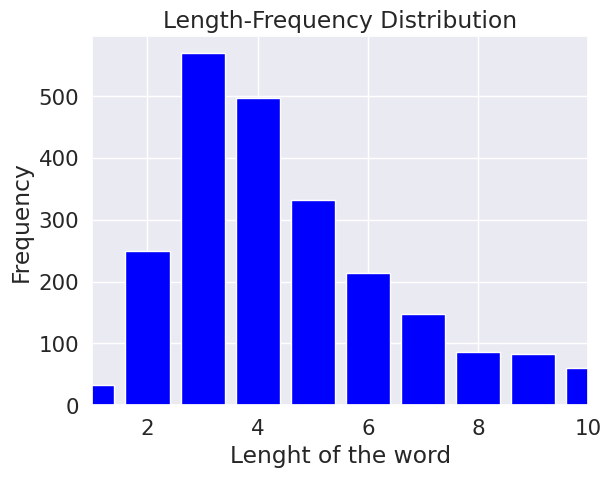

Maximum Length of a comment: 65
Minimum Length of a comment: 1
Average Length of a comment: 6.0


<Figure size 640x480 with 0 Axes>

In [26]:
frequency = dict()
for i in dataset.length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 10)

plt.xlabel('Lenght of the word')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a comment: {max(dataset.length)}")
print(f"Minimum Length of a comment: {min(dataset.length)}")
print(f"Average Length of a comment: {round(np.mean(dataset.length),0)}")

plt.savefig("Length-Frequency Distribution Bangla BarChart.png")

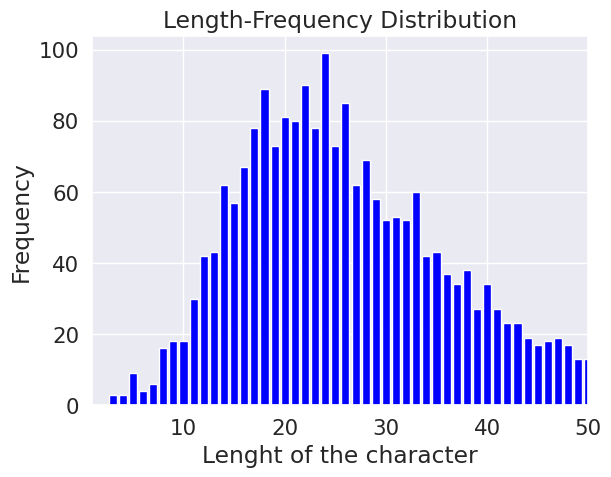

Maximum Length of a comment: 443
Minimum Length of a comment: 3
Average Length of a comment: 38.0


<Figure size 640x480 with 0 Axes>

In [27]:
frequency = dict()
for i in dataset.no_char:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 50)

plt.xlabel('Lenght of the character')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a comment: {max(dataset.no_char)}")
print(f"Minimum Length of a comment: {min(dataset.no_char)}")
print(f"Average Length of a comment: {round(np.mean(dataset.no_char),0)}")
plt.savefig("Character Frequency Distribution Bangla BarChart.png")

# **Data Set Summary**

In [28]:
def data_summary(dataset):
    documents = []
    words = []
    most_frequent_word =[]
    u_words = []

    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]

    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].cleaned) for word in t.strip().split()]

        counts = dict()

        for word in word_list:
                counts[word] = counts.get(word, 0)+1

        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)

        documents.append(len(list(dataset[dataset.sentiment==label].cleaned)))

        words.append(len(word_list))

        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of comments:{}".format(len(list(dataset[dataset.sentiment==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:15]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Positive
Number of comments:1439
Number of Words:8566
Number of Unique Words:2142
Most Frequent Words:

ভালো	400
ভাল	257
ধন্যবাদ	187
সুন্দর	145
দাম	125
প্রোডাক্ট	115
পণ্য	110
পেয়েছি	88
খুবই	77
আলহামদুলিল্লাহ	77
দামে	76
মানের	76
টা	73
সেলার	72
কম	71

Class Name :  Negative
Number of comments:1138
Number of Words:6632
Number of Unique Words:2189
Most Frequent Words:

না	152
ভালো	115
বাজে	93
খারাপ	86
প্রোডাক্ট	84
একটা	80
কোয়ালিটি	68
পণ্য	62
ভাল	62
মানের	56
সাথে	55
দারাজ	55
খুবই	54
টা	53
অর্ডার	52
Total Number of Unique Words:3529


***New Dataframe for Data Summary***

In [29]:
data_matrix = pd.DataFrame({'Total comments':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

In [30]:
data

,Class Names,Category,Values
0,Positive,Total comments,1439
1,Negative,Total comments,1138
2,Positive,Total Words,8566
3,Negative,Total Words,6632
4,Positive,Unique Words,2142
5,Negative,Unique Words,2189


***Data Summary Visualization***

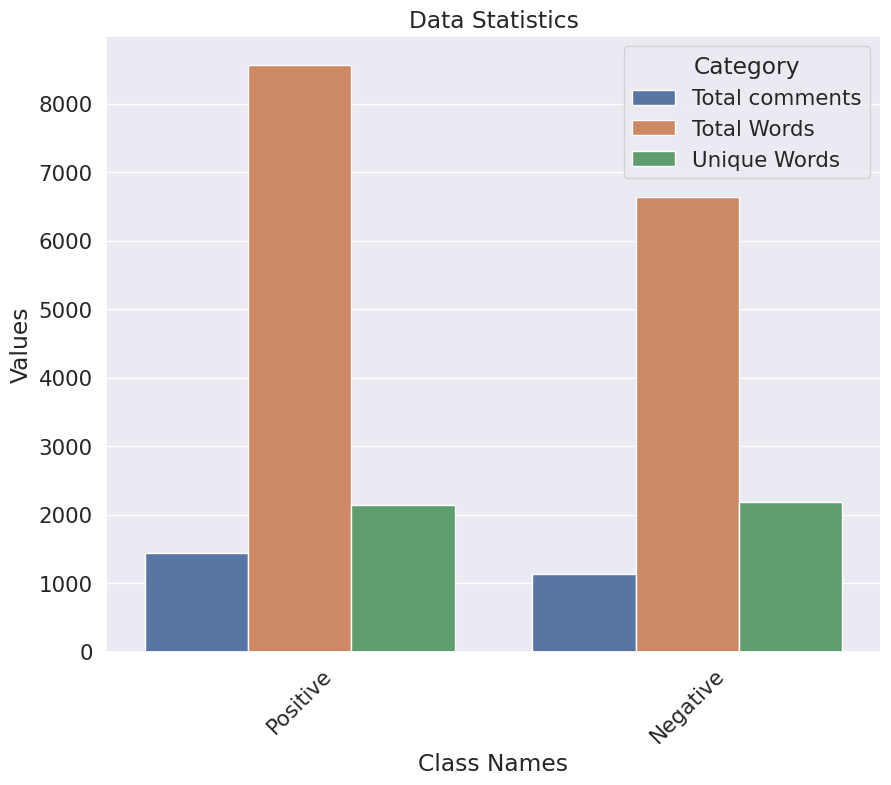

In [31]:
plt.figure(figsize=(10, 8))
ax = plt.subplot()

sns.barplot(data=data,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

plt.savefig("Data Statistics Bangla BarChart.png")

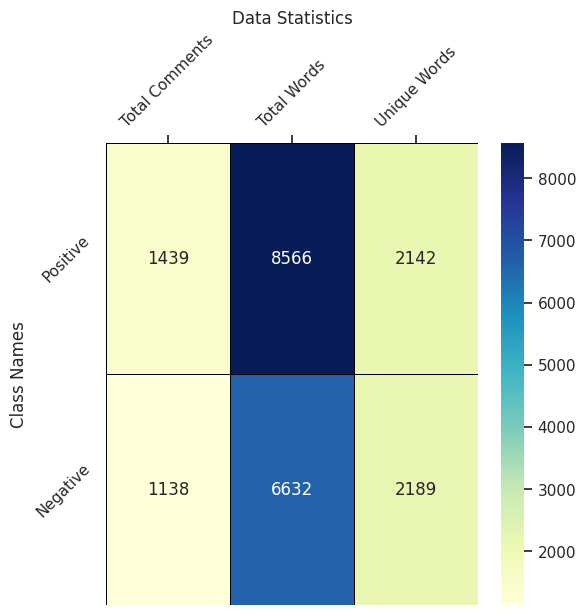

In [32]:
sns.set()
plt.figure(figsize =(6, 6))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)

ax.set_ylabel('Class Names')
ax.set_title('Data Statistics')
y_label = ["Total Comments", "Total Words", "Unique Words"]
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()
plt.savefig("Data Statistics Bangla.png")

## **Label Encoding Function**

In [33]:
def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


# **Dataset Splitting Function**

In [34]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [35]:
dataset.cleaned = dataset.stemming.apply(lambda x:x.replace('\n',' '))

In [36]:
dataset

,Comments,sentiment,cleaned,length,no_char,stemming
0,এই পণ্য ভাল না।,Negative,পণ্য ভাল না,3,12,পণ্য ভাল না
1,১০০% অথেন্টিক প্রডাক্ট,Positive,১০০ অথেন্টিক প্রডাক্ট,3,22,১০০ অথেন্টিক প্রডাক্ট
2,৩ বছরের ওয়ারেন্টিও আছে!,Positive,৩ বছরের ওয়ারেন্টিও আছে,4,23,৩ বছরের ওয়ারেন্টিও আছে
3,পিকাবো থেকে চমৎকার সেবা।,Positive,পিকাবো চমৎকার সেবা,3,19,পিকাবো চমৎকার সেবা
4,পিওরিট সম্পর্কে কোন সন্দেহ নেই।,Positive,পিওরিট সম্পর্কে সন্দেহ নেই,4,27,পিওরিট সম্পর্কে সন্দেহ নেই
...,...,...,...,...,...,...
2572,"হেডফোনটা সত্যিই অসাধারণ , অনেক সুন্দর সাউন্ড এ...",Positive,হেডফোনটা সত্যিই অসাধারণ সুন্দর সাউন্ড জোরে সাউ...,13,88,হেডফোনটা সত্যিই অসাধারণ সুন্দর সাউন্ড জোরে সাউ...
2573,হেডফোনের গুণমান এই মূল্য পরিসরে ভাল নয়।,Negative,হেডফোনের গুণমান মূল্য পরিসরে ভাল নয়,6,37,হেডফোনের গুণমান মূল্য পরিসরে ভাল নয়
2574,"হেভি গেমিং এর জন্য বেস্ট, ক্যামেরাও অনেক ভালো",Positive,হেভি গেমিং বেস্ট ক্যামেরাও ভালো,5,32,হেভি গেমিং বেস্ট ক্যামেরাও ভালো
2575,হ্যাঁ খুশি ভাল অবস্থা,Positive,হ্যাঁ খুশি ভাল অবস্থা,4,21,হ্যাঁ খুশি ভাল অবস্থা


In [37]:
dataset=dataset.drop(["Comments","cleaned","length","no_char"],axis=1)

In [38]:
dataset.head()

,sentiment,stemming
0,Negative,পণ্য ভাল না
1,Positive,১০০ অথেন্টিক প্রডাক্ট
2,Positive,৩ বছরের ওয়ারেন্টিও আছে
3,Positive,পিকাবো চমৎকার সেবা
4,Positive,পিওরিট সম্পর্কে সন্দেহ নেই


# ***Unigram Tf-idf value calculation***

In [39]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(Conversations)

    return tfidf,X

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [41]:
def ml_models_defination():

    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    mnb_model = MultinomialNB(alpha=0.12)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','SVM','sgd']

    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_performance(model, X_train, X_test, y_train, y_test):

    my_dict = {}
    model.fit(X_train, y_train)

    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y), 4) * 100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, pos_label=1), 4) * 100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, pos_label=1), 4) * 100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, pos_label=1), 4) * 100
    return my_dict


In [43]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []

    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Multi. Naive Bayes','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

# **Unigram**

In [44]:
x = ["আমি মনে করি আমি আমার টাকা অপচয়"]

def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

get_top_n_words(x,3)

[('আম', 3), ('মন', 1), ('কর', 1)]

# **Bigram**

In [45]:
y = ["আমি মনে করি আমি আমার টাকা অপচয়"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(y,3)

[('আম মন', 1), ('মন কর', 1), ('কর আম', 1)]

# **Tigram**

In [46]:
z = ["আমি মনে করি আমি আমার টাকা অপচয়"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(z,3)

[('আম মন কর', 1), ('মন কর আম', 1), ('কর আম আম', 1)]

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]

for i,gram in enumerate(ngrams):
     tfidf,feature = calc_gram_tfidf(dataset.stemming)
     labels = label_encoding(dataset.sentiment,False)
     X_train,X_test,y_train,y_test = dataset_split(feature,labels)
     ml_models,model_names = ml_models_defination()
     accuracy = {f'{model_names[j]}': model_performance(model, X_train, X_test, y_train, y_test) for j, model in enumerate(ml_models)}

     with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy,f)

Feature Size :======> 22378

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2577 
	Training		 2061 
	Test			 516
Feature Size :======> 22378

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2577 
	Training		 2061 
	Test			 516
Feature Size :======> 22378

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2577 
	Training		 2061 
	Test			 516


In [49]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
table

,Accuracy,Precision,Recall,F1 Score,Model Name
0,82.95,77.75,96.07,85.94,Logistic Regression
1,82.36,85.13,81.79,83.42,Decision Tree
2,81.01,76.61,93.57,84.24,Random Forest
3,84.30,83.96,87.86,85.86,Multi. Naive Bayes
4,77.91,78.82,81.07,79.93,KNN
5,86.43,85.71,90.00,87.80,SVM
6,84.50,85.21,86.43,85.82,SGD


In [50]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by 5 at = 86.42999999999999
Highest F1-Score achieved by 5 at = 87.8
Highest Precision Score achieved by 5 at = 85.71
Highest Recall Score achieved by 0 at = 96.07


In [51]:
svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
svm_model.fit(X_train, y_train)
svm_model.score(X_test,y_test)

0.8643410852713178

In [52]:
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)

[[194  42]
 [ 28 252]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       236
           1       0.86      0.90      0.88       280

    accuracy                           0.86       516
   macro avg       0.87      0.86      0.86       516
weighted avg       0.86      0.86      0.86       516



In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Postive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

In [55]:
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

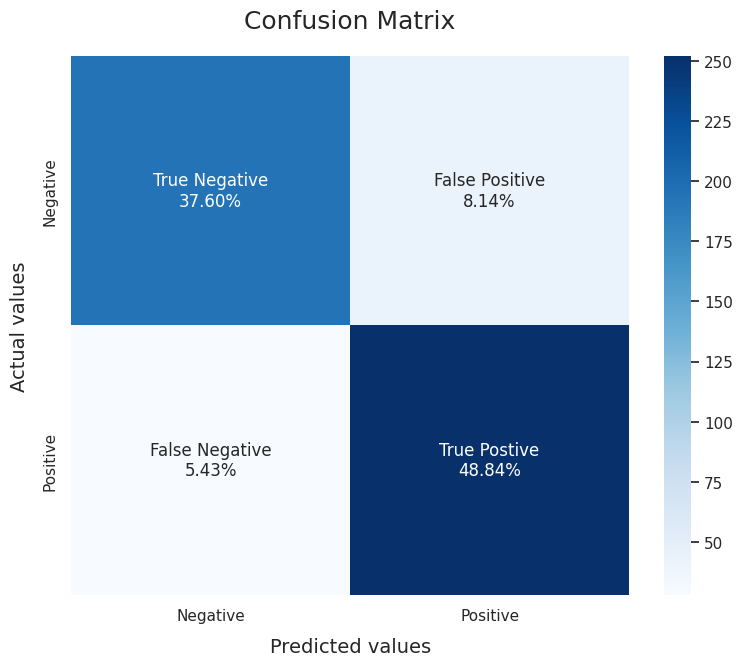

In [56]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.savefig("Confusion Matrix Bangla.png")

<Axes: >

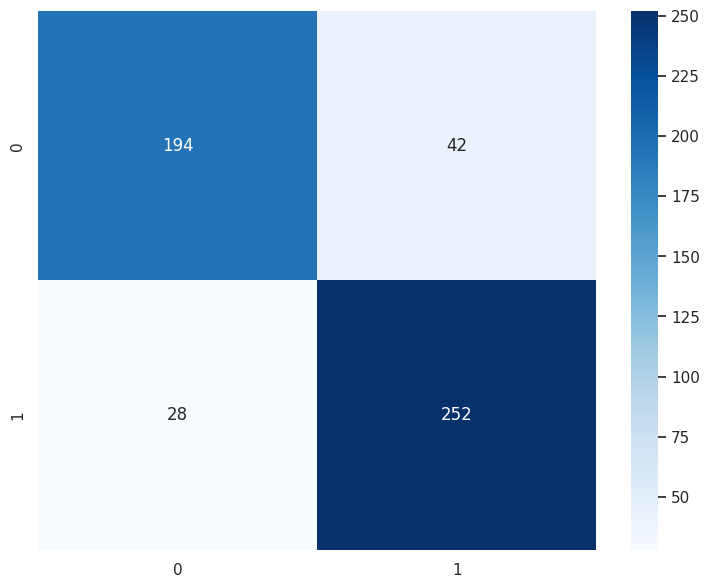

In [57]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cf_matrix,cmap='Blues', annot=True,fmt='d')

In [58]:
import pickle
file = open('cs_svm.pkl', 'wb')
pickle.dump(svm_model, file)

# **Machine Learning Prediction**

In [59]:
model = open('cs_svm.pkl','rb')
svm_model = pickle.load(model)
Comment =  'আমি মনে করি আমি আমার টাকা অপচয়	'
processed_conversation = process_conversations(Comment)
if (len(processed_conversation))>0:
    cv,feature_vector = calc_gram_tfidf(dataset.stemming)
    feature = cv.transform([processed_conversation]).toarray()
    Result = svm_model.predict(feature)
    if (Result == 0):
        print(f"Negative")
    else:
        print(f"Positive")
else:
    print("This conversation doesn't contains any bengali Words")

Negative
